# RMM Mark 2.1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
rm = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_rm.png')
rm_rgb = cv2.cvtColor(rm, cv2.COLOR_BGR2RGB)
rm_res = cv2.resize(rm_rgb, (int(rm_rgb.shape[1]*50/100), int(rm_rgb.shape[0]*50/100)), cv2.INTER_AREA)
roi = rm_res.copy()

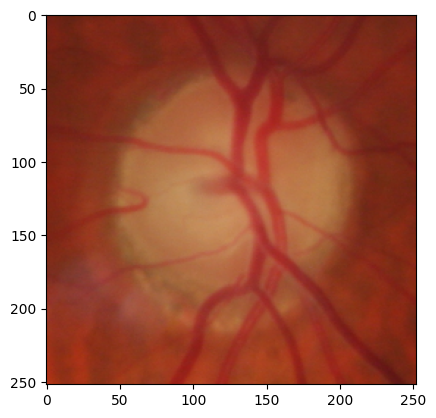

In [71]:
plt.imshow(rm_res)

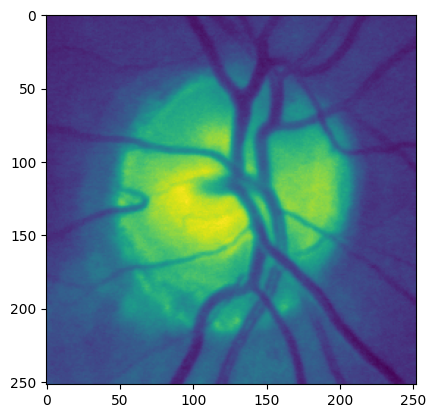

In [10]:
plt.imshow(roi[:,:,1])

In [11]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [12]:
green = roi[:,:,1].copy()

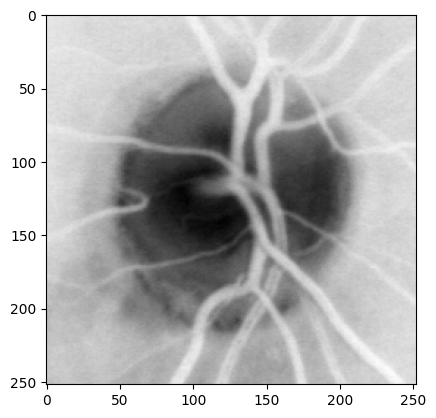

In [13]:
green_inv = 255-green.copy()
plt.imshow(green_inv, 'gray')

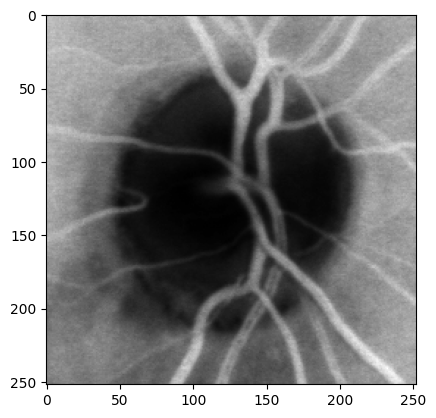

In [14]:
gmc = adjust_gamma(green_inv, 5.0)
plt.imshow(gmc, 'gray')

In [15]:
clahe = cv2.createCLAHE(3, (8,8))
gmclahe = clahe.apply(gmc.copy())

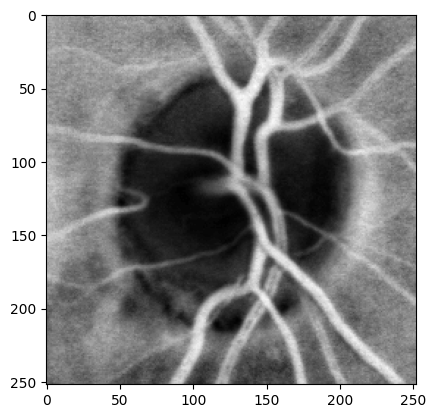

In [16]:
plt.imshow(gmclahe, 'gray')

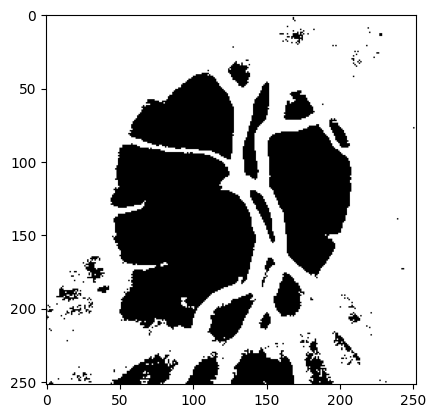

In [17]:
ret, th = cv2.threshold(gmclahe.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th, 'gray')

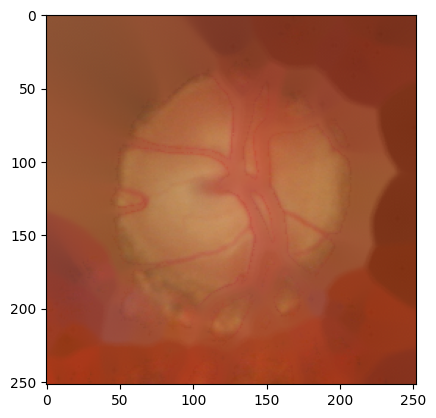

In [52]:
dst = cv2.inpaint(roi.copy(), th, 5,cv2.INPAINT_TELEA)
plt.imshow(dst)

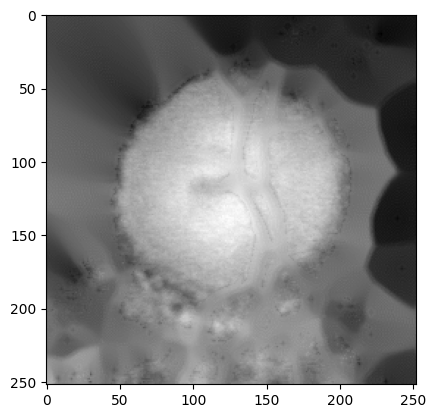

In [53]:
dstr = dst[:,:,0].copy()
plt.imshow(dstr, 'gray')

In [54]:
clahe = cv2.createCLAHE(2, (8,8))
dstrclahe = clahe.apply(dstr.copy())

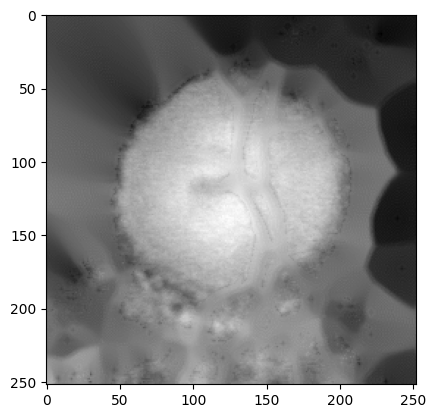

In [63]:
plt.imshow(dstr, 'gray')

In [64]:
dstrgam = adjust_gamma(dstr.copy(), gamma=5)

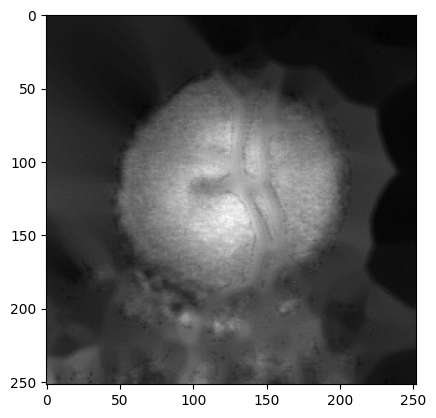

In [65]:
plt.imshow(dstrgam, 'gray')

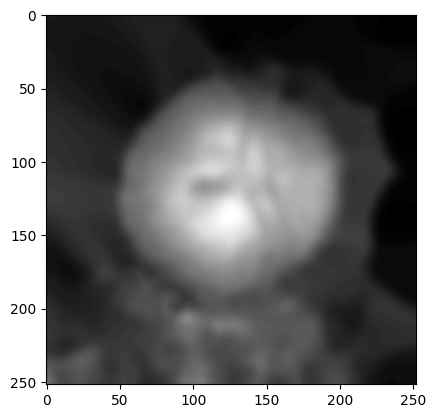

In [66]:
blur = cv2.GaussianBlur(dstrgam.copy(), (19,19), 0)
plt.imshow(blur, 'gray')

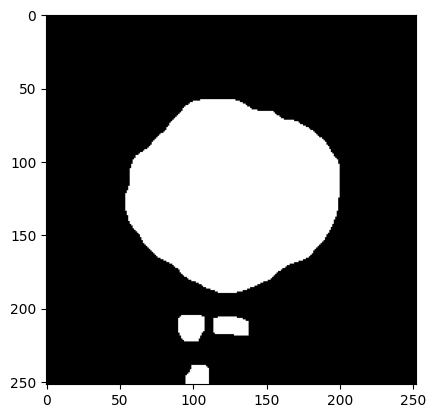

In [67]:
erosion = cv2.erode(blur.copy(), kernel=np.ones((10, 10), np.uint8))
dilation = cv2.dilate(erosion.copy(), kernel=np.ones((10, 10), np.uint8))
ret2, th2 = cv2.threshold(dilation.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, 'gray')

In [68]:
cont, hcy = cv2.findContours(th2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

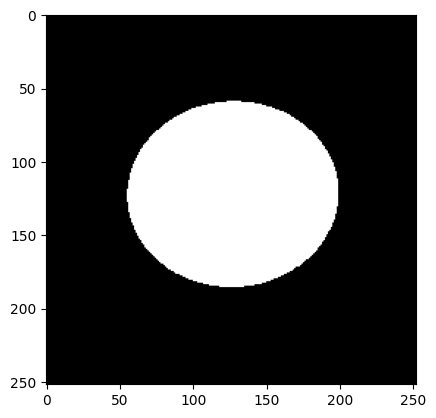

In [69]:
roic = roi.copy()
thhh = th2.copy()
if len(cont) > 1:
    conts = np.array([c.shape[0] for c in cont])
    cont_idx = np.argmax(conts)
    ellipse = cv2.fitEllipse(cont[cont_idx])
else:
    ellipse = cv2.fitEllipse(cont)
    
od = np.zeros_like(thhh, dtype='uint8')
cv2.ellipse(od, ellipse, (255, 255, 255), -1)
cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(od, 'gray')  

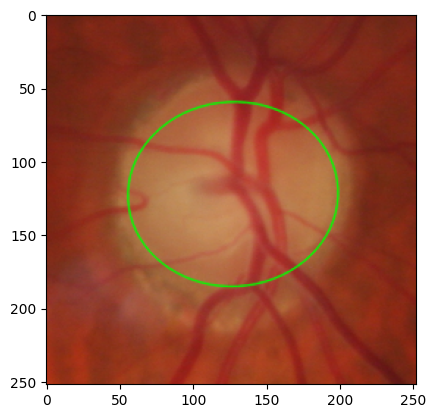

In [70]:
plt.imshow(roic)